___


- THIS NOTEBOOK IS FROM STUDY GROUPS ON 01/08/2020 and 01/09/2020
___


# NOTES FROM JAMES:
Study Group 01/02/20

1. Make sure you **READ, FORK, and CLONE** the official [Mod 4 Project Lesson Repo](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/end-of-module-4-project/module-4-final-project)
2. Make sure to replace the original `melt_df` function with fixed version.
3. Make sure to consult the [Project Rubric](https://github.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/blob/master/module4_project_rubric.pdf)
4. For forecasting into the future & using train_test_split:
    - First split data into train and test sets.
    - After training model, get predictions for test set.
    - Get another set of predictions built off of train+test set combined.
    
5. **If you use this notebook as a starting point, the only function you may use as-is in your personal project notebook is the `melt_data` function.**
    - **You MUST either significantly edit and document the functions we wrote together OR (ideally) write your own functions.**
    ___

# Mod 4 Project - Starter Notebook




This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/images/df_head.png">
You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/images/melted1.png">


There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!



# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

fsds_1007219  v0.6.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
## Import Your Mod 4 Functions (if you have them in a .py file)
# import instructor_notebooks.functions_mod4proj as ji
# help(ji)

## LIMITING DF TO JUST STATE OF MD

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/zillow_data.csv')#'zillow_data.csv')

## LIMITING DATASET TO MD
df = df.groupby('State').get_group("MD")
df.head().style.set_caption("ORIGINAL WIDE FORMAT")

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
59,66843,21234,Parkville,MD,Baltimore,Baltimore,60,99000,99000,99100,99100,99000,99000,99000,99000,99100,99300,99500,99700,99800,99900,100000,100100,100100,100200,100100,100100,100100,100200,100200,100100,99900,99800,99600,99500,99300,99200,99300,99400,99700,100100,100400,100700,101000,101300,101600,101800,102100,102400,102700,103100,103500,104100,104600,105100,105500,105900,106300,106600,106800,107100,107400,107800,108100,108500,109000,109500,110100,110700,111300,111900,112500,113100,113800,114500,115300,116200,117100,118100,119000,120000,121000,121900,123000,124100,125300,126700,128300,129800,131200,132500,134000,135300,136700,138200,139800,141500,143300,145100,146900,148700,150400,152100,153900,155800,157800,160200,163000,166100,169300,172600,175700,178600,181300,184000,186800,189800,192900,196100,199000,201500,203700,205700,207700,209700,211700,214000,216500,218700,220700,222500,223800,224800,225400,225700,225900,226300,226600,227300,228000,228500,228600,228500,228000,227200,226300,225500,224700,223800,222400,221100,219900,218400,216700,215200,213500,212000,210800,210000,209500,208900,208000,207200,206200,204600,203000,202100,201500,201000,200700,201000,200800,200800,201900,201100,198500,197500,197100,194600,192400,190700,188700,186800,184900,182200,179600,177700,176500,175700,175000,174600,174700,175100,175000,173800,172900,173800,174800,174900,175100,175300,175500,175800,175800,175500,175300,175400,175400,174400,173300,173300,173700,173800,174200,174600,174900,175300,175400,175200,174900,174300,173400,173500,173600,173200,173100,173600,173500,173700,174400,175200,175900,176700,177900,178900,180300,181500,182200,182700,184000,185300,186500,186700,186700,187400,187800,187300,186900,187200,188700,190600,191100,190100,189000,189300,190000,190400,190600,190900,191800,193000,193100,192500,19

In [4]:
fs.quick_refs.ts_pandas_freq_aliases()

PANDAS TIME FREQUENCY ALIASES
[i] Documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


| Alias | Description |
    |----|-----|
    |B|business day frequency|
    |C|custom business day frequency|
    |D|calendar day frequency|
    |W|weekly frequency|
    |M|month end frequency|
    |SM|semi-month end frequency (15th and end of month)|
    |BM|business month end frequency|
    |CBM|custom business month end frequency|
    |MS|month start frequency|
    |SMS|semi-month start frequency (1st and 15th)|
    |BMS|business month start frequency|
    |CBMS|custom business month start frequency|
    |Q|quarter end frequency|
    |BQ|business quarter end frequency|
    |QS|quarter start frequency|
    |BQS|business quarter start frequency|
    |A, Y| year end frequency|
    |BA, BY |business year end frequency|
    |AS, YS |year start frequency|
    |BAS, BYS |business year start frequency|
    |BH|business hour frequency|
    |H|hourly frequency|
    |T, min |minutely frequency|
    |S|secondly frequency|
    |L, ms|milliseconds|
    |U, us |microseconds|
    |N|nanoseconds|
    

In [5]:
def melt_data(df):
    
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName', 
                                  'SizeRank'], var_name='Month', value_name='MeanValue')
    melted['Month'] = pd.to_datetime(melted['Month'], format='%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [6]:
df = melt_data(df)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
0,66843,21234,Parkville,MD,Baltimore,Baltimore,60,1996-04-01,99000.0
1,66705,20906,Silver Spring,MD,Washington,Montgomery,132,1996-04-01,155400.0
2,67010,21740,Hagerstown,MD,Hagerstown,Washington,190,1996-04-01,89700.0
3,66785,21117,Owings Mills,MD,Baltimore,Baltimore,208,1996-04-01,145800.0
4,66683,20878,Gaithersburg,MD,Washington,Montgomery,254,1996-04-01,246100.0


In [7]:
def make_datetimeindex(df,col_to_make_index = 'Month',drop=False,verbose=True):

    df[col_to_make_index] = pd.to_datetime(df[col_to_make_index],errors='coerce')
    df = df.set_index('Month',drop=drop)
    
    if verbose:
        display(df.index)
    return df

In [8]:
df = make_datetimeindex(df)#,freq='MS')

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Month', length=83531, freq=None)

In [9]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
Month,,,,,,,,,
1996-04-01,66843,21234,Parkville,MD,Baltimore,Baltimore,60,1996-04-01,99000.0
1996-04-01,66705,20906,Silver Spring,MD,Washington,Montgomery,132,1996-04-01,155400.0
1996-04-01,67010,21740,Hagerstown,MD,Hagerstown,Washington,190,1996-04-01,89700.0
1996-04-01,66785,21117,Owings Mills,MD,Baltimore,Baltimore,208,1996-04-01,145800.0
1996-04-01,66683,20878,Gaithersburg,MD,Washington,Montgomery,254,1996-04-01,246100.0


# Step 2: Preprocessing

In [10]:
df = df.rename({'Month':'MonthOrig'},axis=1)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-04-01,66843,21234,Parkville,MD,Baltimore,Baltimore,60,1996-04-01,99000.0
1996-04-01,66705,20906,Silver Spring,MD,Washington,Montgomery,132,1996-04-01,155400.0
1996-04-01,67010,21740,Hagerstown,MD,Hagerstown,Washington,190,1996-04-01,89700.0
1996-04-01,66785,21117,Owings Mills,MD,Baltimore,Baltimore,208,1996-04-01,145800.0
1996-04-01,66683,20878,Gaithersburg,MD,Washington,Montgomery,254,1996-04-01,246100.0


In [11]:
df_city =  df.groupby('CountyName').get_group('Baltimore City')
df_county = df.groupby('CountyName').get_group('Baltimore')

display(df_city.head(),df_city.index,df_county.head())

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-04-01,66825,21215,Baltimore,MD,Baltimore,Baltimore City,317,1996-04-01,53500.0
1996-04-01,66834,21224,Baltimore,MD,Baltimore,Baltimore City,442,1996-04-01,49600.0
1996-04-01,66828,21218,Baltimore,MD,Baltimore,Baltimore City,606,1996-04-01,44700.0
1996-04-01,66816,21206,Baltimore,MD,Baltimore,Baltimore City,678,1996-04-01,73200.0
1996-04-01,66839,21229,Baltimore,MD,Baltimore,Baltimore City,1005,1996-04-01,56000.0


DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Month', length=3710, freq=None)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-04-01,66843,21234,Parkville,MD,Baltimore,Baltimore,60,1996-04-01,99000.0
1996-04-01,66785,21117,Owings Mills,MD,Baltimore,Baltimore,208,1996-04-01,145800.0
1996-04-01,66832,21222,Dundalk,MD,Baltimore,Baltimore,368,1996-04-01,76900.0
1996-04-01,66838,21228,Catonsville,MD,Baltimore,Baltimore,737,1996-04-01,127500.0
1996-04-01,66817,21207,Lochearn,MD,Baltimore,Baltimore,747,1996-04-01,86300.0


In [12]:
print(f"[i] There are {df_city['RegionName'].nunique()} zipcodes in Baltimore City")
display(df_city.head())
df_city.index

[i] There are 14 zipcodes in Baltimore City


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-04-01,66825,21215,Baltimore,MD,Baltimore,Baltimore City,317,1996-04-01,53500.0
1996-04-01,66834,21224,Baltimore,MD,Baltimore,Baltimore City,442,1996-04-01,49600.0
1996-04-01,66828,21218,Baltimore,MD,Baltimore,Baltimore City,606,1996-04-01,44700.0
1996-04-01,66816,21206,Baltimore,MD,Baltimore,Baltimore City,678,1996-04-01,73200.0
1996-04-01,66839,21229,Baltimore,MD,Baltimore,Baltimore City,1005,1996-04-01,56000.0


DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Month', length=3710, freq=None)

### Make BCTY (dict of zipcode dfs)

In [13]:
BCTY = {}
for zipcode in df_city['RegionName'].unique():
    temp = df_city.groupby("RegionName").get_group(zipcode)
    BCTY[zipcode]=temp.resample('MS').asfreq()
BCTY

{21215:             RegionID  RegionName       City  ... SizeRank  MonthOrig MeanValue
 Month                                        ...                              
 1996-04-01     66825       21215  Baltimore  ...      317 1996-04-01   53500.0
 1996-05-01     66825       21215  Baltimore  ...      317 1996-05-01   53500.0
 1996-06-01     66825       21215  Baltimore  ...      317 1996-06-01   53400.0
 1996-07-01     66825       21215  Baltimore  ...      317 1996-07-01   53300.0
 1996-08-01     66825       21215  Baltimore  ...      317 1996-08-01   53300.0
 ...              ...         ...        ...  ...      ...        ...       ...
 2017-12-01     66825       21215  Baltimore  ...      317 2017-12-01   66800.0
 2018-01-01     66825       21215  Baltimore  ...      317 2018-01-01   67400.0
 2018-02-01     66825       21215  Baltimore  ...      317 2018-02-01   69500.0
 2018-03-01     66825       21215  Baltimore  ...      317 2018-03-01   72900.0
 2018-04-01     66825       21215

# Step 3: EDA and Visualization

[21215, 21224, 21218, 21206, 21229, 21230, 21239, 21212, 21201, 21211, 21231, 21214, 21210, 21226]


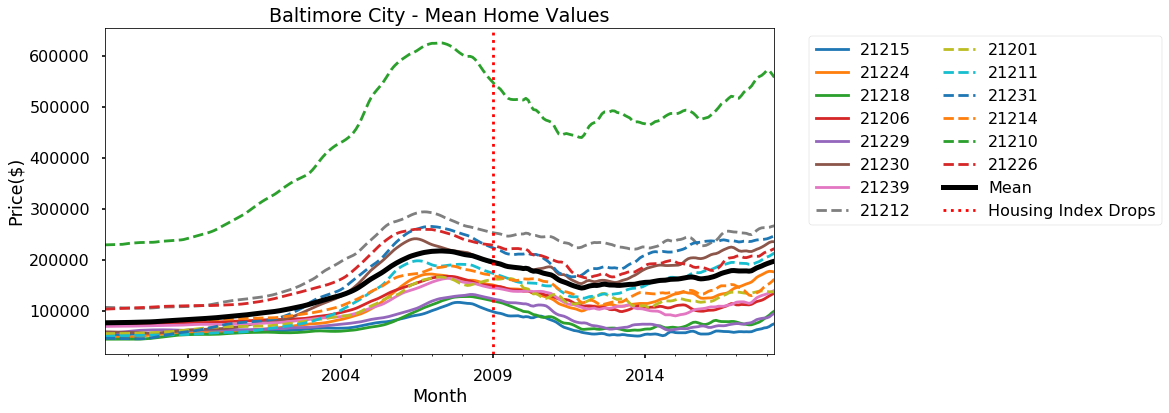

In [14]:
# ts =df2['MeanValue'].loc[21201]
def plot_ts_dict(df_dict,col='MeanValue',zipcodes=[]):
    
    if len(zipcodes)==0:
        zipcodes=list(df_dict.keys())
        
    print(zipcodes)
    
    cutoff = len(zipcodes)//2
    
        
    fig,ax = plt.subplots(figsize=(12,6))
    
    ts_dict = {}
    for i,zc in enumerate(zipcodes):
        if i <cutoff:
            ls='-'
        else:
            ls='--'
            
        ts = df_dict[zc][col].rename(zc)#.loc[zc]
        ts.plot(label=str(zc),ax=ax,ls=ls)
        ts_dict[zc] = ts

    ## CALCULTE MEAN   
    mean = pd.DataFrame(ts_dict).mean(axis=1)
    mean.plot(label='Mean',lw=5,color='black')

    crash = '01-2009'
    ax.axvline(crash, label='Housing Index Drops',color='red',ls=':')

    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)
    ax.set(title='Baltimore City - Mean Home Values',
          ylabel='Price($)')

    return fig,ax,ts_dict
fig,ax,tsdict = plot_ts_dict(BCTY)

## 01/09/2020

- Let's analyze Blatimore City vs Baltimore County

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot,lag_plot

In [16]:
def plot_acf_pacf(ts, figsize=(10,8),lags=20):
    fig,ax = plt.subplots(nrows=3,figsize=figsize)
    ts.plot(ax=ax[0])
    plot_acf(ts,ax=ax[1],lags=lags)
    plot_pacf(ts, ax=ax[2],lags=lags) 
    plt.tight_layout()
    
    plt.suptitle(f"Zipcode: {ts.name}",y=1.1,fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    

In [17]:
zips = list(tsdict.keys())
zips

[21215,
 21224,
 21218,
 21206,
 21229,
 21230,
 21239,
 21212,
 21201,
 21211,
 21231,
 21214,
 21210,
 21226]


## ACF and PACF intuition for AR(p) and MA(q)

A quick overview of how higher order models affect the ACF and PACF functions

### AR(p)

Considering a time series that was generated by an autoregression (AR) process with an order of p, we would expect the ACF plot for the AR(p) time series to be strong to a lag of p and remain stagnant for subsequent lag values, trailing off at some point as the effect is weakened. The PACF, on the other hand, describes the direct relationship between an observation and its lag. This generally leads to no correlation for lag values beyond p.

### MA(q)

With a time series generated by a moving average (MA) process with an order q, we would expect the ACF for the MA(q) process to show a strong correlation with recent values up to the lag of q, then an immediate decline to minimal or no correlation. For the PACF, we would expect the plot to show a strong relationship to the lag and then a tailing off to no correlation from the lag onwards.


## ARMA models

Now that we've seen AR and MA models, it is important to note that **there is no reason why AR and MA models would not coexist**. That's where ARMA models come in, which basically means that in this model, a regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part).
Generally, one denotes ARMA as ARMA(p,q).

An ARMA(2,1) model is given by:


 $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$


A short table to summarize ACF and PACF for AR(p), MA(q) and ARMA(p,q):


| Stat | AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |

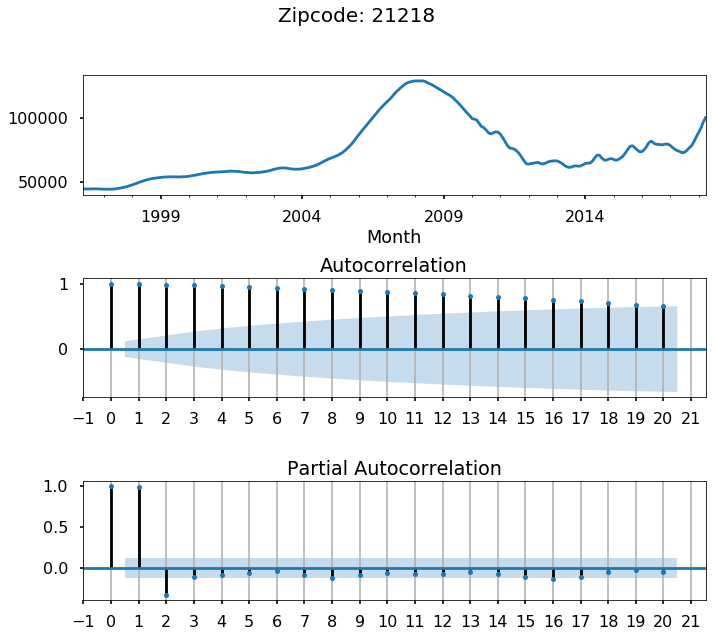

In [18]:
ts = tsdict[ np.random.choice(zips)]
plot_acf_pacf(ts)

### UPDATED INFO ON READING PACF/ACF FOR AR/MA
- **USE ACF TO JUDGE IF MA OR AR COMPONENTS:**
    - If lag 1 is positive: AR
    - If lag 1 is negatige: MA
    
- **PACF is best for picking AR (p)**
- **ACF is best for picking MA(q)**
    - If sharp drop off at lag of k (k= point on x axis) means use an AR model of order k.
    - If slow gradual decline: use MA
    
    
___
INFO FROM LESSONS:

- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lag and tailing off to no correlation afterwards.
   
- Notation is generally ARMA(p,q)
- Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| Param| AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |
    

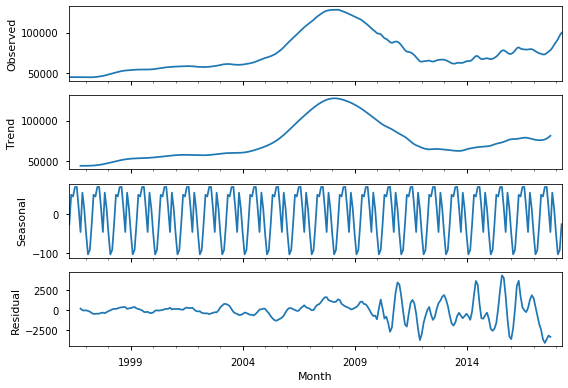

In [19]:
plt.style.use('seaborn-notebook')
# mpl.rcParams['figure.figsize']=(12,5)

decomp = seasonal_decompose(ts)
decomp.plot();
plt.tight_layout()

# Step 5: ARIMA Modeling

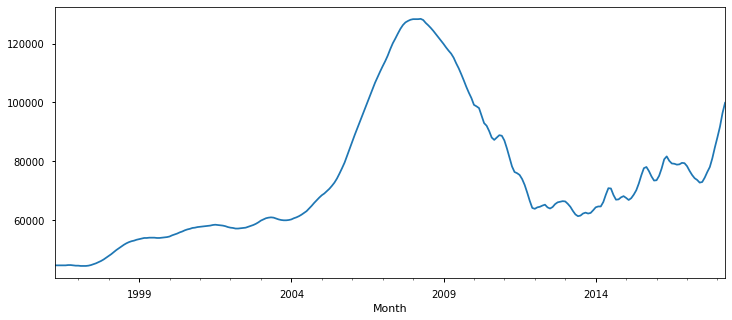

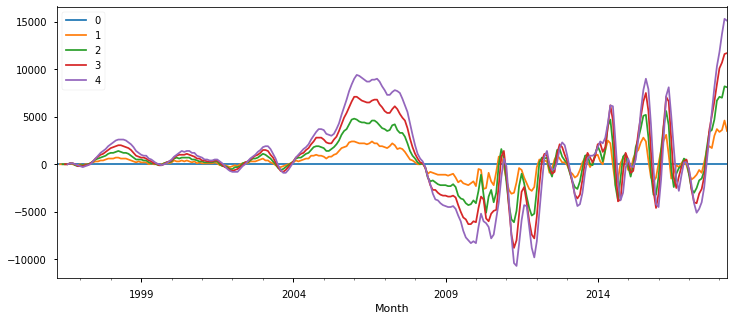

In [20]:
mpl.rcParams['figure.figsize']=(12,5)
ts.plot( )
plt.figure()
for i in range(5):
    ax = ts.diff(i).plot(label=i)
#     ax.set
ax.legend()

In [21]:
# import itertools

# p_range = range(0,10)
# q_range = range(0,10)
# d_range=range(1,3)
# m_range=(0,6,12)

# pdq = list(itertools.product(p_range,d_range,q_range))
# PDQM = list(itertools.product(p_range,d_range,q_range,m_range))
# PDQM[:10]

In [22]:
def make_pdq_pdqm(ps=[0,1,3],ds=[0,1,2,3], 
                  qs=[0,1,3],make_seasonal=True,
                  m_values=[12]):
    import itertools
#     ps =range(p_range[0],p_range[1])
#     ds =range(d_range[0],d_range[1])
#     qs =range(q_range[0],q_range[1])
    
    params = {}
    params['pdq'] = list(itertools.product(ps,ds,qs))
    
    if make_seasonal:
        params['PDQm'] = list(itertools.product(ps,ds,qs,m_values))
    return params

# fs.ihelp(ji.get_train_test_split_index,0)
def get_train_test_split_index(ts, TEST_SIZE=0.1,min_test_ts=2):
    import math
    idx_split = math.floor(len(ts.index)*(1-TEST_SIZE))
    
    num_test_ts=len(ts.iloc[idx_split:])
    if num_test_ts<min_test_ts:
        print(f'[!] Warning: using TEST_SIZE={TEST_SIZE} produced {num_test_ts} test timestamps.')
        print("- Overriding TEST_SIZE and using min_test_ts instead.")
        idx_split = len(ts)-min_test_ts
    
    return idx_split


def train_test_split_ts(ts,test_size=0.2,min_test_ts=2):
    idx_split = get_train_test_split_index(ts,TEST_SIZE=test_size,
                                           min_test_ts=min_test_ts)
    ts_train = ts.iloc[:idx_split]
    ts_test = ts.iloc[idx_split:]
    return ts_train, ts_test

def get_now(return_dt = True, return_str=True, show=False):
    import datetime as dt
    import tzlocal as tz
    now=dt.datetime.now(tz=tz.get_localzone())
    str_time =now.strftime('%m/%d/%Y - %I:%M:%S %p')
    if show:
        print(str_time)
    
    output=[]
    if return_dt:
        output.append(now)
        
    if return_str:
        output.append(str_time)
    return output[:]


    

In [23]:
params = make_pdq_pdqm()
print(params.keys())
print(params['pdq'][:10])
params['PDQm'][:10]

dict_keys(['pdq', 'PDQm'])
[(0, 0, 0), (0, 0, 1), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 3), (0, 3, 0)]


[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 3, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 3, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 3, 12),
 (0, 3, 0, 12)]

### Old Grid Search Functions

In [24]:
# def get_now(return_dt = True, return_str=True, show=False):
#     import datetime as dt
#     import tzlocal as tz
#     now=dt.datetime.now(tz=tz.get_localzone())
#     str_time =now.strftime('%m/%d/%Y - %I:%M:%S %p')
#     if show:
#         print(str_time)
    
#     output=[]
#     if return_dt:
#         output.append(now)
        
#     if return_str:
#         output.append(str_time)
#     return output[:]


# from statsmodels.tsa.statespace.sarimax import SARIMAX
# def grid_search_sarimax(ts_train,pdq=None,pdqm=None,order_dict=None,
#                         verbose=False, model_kws={}):

#     from tqdm import trange
    
#     if (pdq is None) & (order_dict is not None):
#         pdq= order_dict['pdq']
#     if (pdqm is None) & (order_dict is not None):
#         pdqm= order_dict['PDQm']

# #     import tqdm
# #     from tqdm import trange

#     start,start_str = get_now(return_dt=True, return_str=True)
#     print(f'[i] STARTING GRID SEARCH @ {start_str}:')

#     res = [['pdq','PDQM','AIC']]
#     for i in trange((len(pdq))):
#         comb = pdq[i]
        
#         for combs in pdqm:
#             try: 
#                 model = SARIMAX(ts_train, order=comb, 
#                                seasonal_order =combs,enforce_stationarity=False,
#                                enforce_invertibility=False,**model_kws)
                
#                 output= model.fit()
#                 res.append([comb,combs,output.aic])
#             except:
#                 if verbose:
#                     print(f"[!] Error running ({comb})({combs})")
#                 continue
#     end,end_str = get_now(return_dt=True, return_str=True)
#     elapsed = end-start
#     print(f"[i] GRID SEARCH FINISHED AT {end_str}")
#     print(f"\tTotal Time: {elapsed}")

#     try:
#         df_res =fs.list2df(res)
#         return df_res
    
#     except:
#         print('Error converting to df. Returning as list.')
#         return res 

In [25]:
# res = grid_search_sarimax(ts_train,order_dict=params)#pdq,pdqm)
# res

### New Grid Search Functions

In [26]:
slackdef grid_search_arima_optional_s(ts_train,pdq=None,pdqm=None,order_dict=None,
                                 make_seasonal=False, verbose=False, model_kws={}):

    from tqdm import trange
    
    if (pdq is None) & (order_dict is not None):
        pdq= order_dict['pdq']
    if (pdqm is None) & (order_dict is not None):
        pdqm= order_dict['PDQm']

#     import tqdm
#     from tqdm import trange

    start,start_str = get_now(return_dt=True, return_str=True)
    print(f'[i] STARTING GRID SEARCH @ {start_str}:')
    
    
    res = [['pdq','PDQM','AIC']]
    for i in trange((len(pdq))):
        comb = pdq[i]
        
     
        ## BRANCH POINT
        if make_seasonal:
            for combs in pdqm:
                try: 
                    model = SARIMAX(ts_train, order=comb, 
                                   seasonal_order =combs,enforce_stationarity=False,
                                   enforce_invertibility=False,**model_kws)

                    output= model.fit()
                    res.append([comb,combs,output.aic])
                except:
                    if verbose:
                        print(f"[!] Error running ({comb})({combs})")
                    continue
                    
                    
        if make_seasonal == False:
            try: 
                model = SARIMAX(ts_train, order=comb, 
                                enforce_stationarity=False, 
                                enforce_invertibility=False,**model_kws)

                output= model.fit()
                res.append([comb,'N/A',output.aic])
            except:
                if verbose:
                    print(f"[!] Error running ({comb})({combs})")
                    continue
                    
    end,end_str = get_now(return_dt=True, return_str=True)
    elapsed = end-start
    print(f"[i] GRID SEARCH FINISHED AT {end_str}")
    print(f"\tTotal Time: {elapsed}")

    try:
        df_res =fs.list2df(res)
        return df_res
    
    except:
        print('Error converting to df. Returning as list.')
        return res 

### Testing on Single Zipcode

In [27]:
ts = tsdict[21201]
ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)

len(ts_train),len(ts_test)

(238, 27)

In [28]:
res = grid_search_arima_optional_s(ts_train,order_dict=params,make_seasonal=False)#pdq,pdqm)
res.sort_values('AIC',inplace=True)
res.head()

  0%|          | 0/36 [00:00<?, ?it/s]

[i] STARTING GRID SEARCH @ 01/09/2020 - 01:19:38 PM:


100%|██████████| 36/36 [00:02<00:00, 13.92it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:19:41 PM
	Total Time: 0:00:02.588617


,pdq,PDQM,AIC
32,"(3, 2, 3)",N/A,3819.050874
29,"(3, 1, 3)",N/A,3820.358668
35,"(3, 3, 3)",N/A,3821.715990
20,"(1, 2, 3)",N/A,3848.197783
8,"(0, 2, 3)",N/A,3853.797787


In [29]:
best_params =  dict(order=res.iloc[0].loc['pdq'])
best_params

{'order': (3, 2, 3)}

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  21201   No. Observations:                  238
Model:               SARIMAX(3, 2, 3)   Log Likelihood               -1902.525
Date:                Thu, 09 Jan 2020   AIC                           3819.051
Time:                        13:19:41   BIC                           3843.178
Sample:                    04-01-1996   HQIC                          3828.781
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4810      0.101     -4.740      0.000      -0.680      -0.282
ar.L2          0.0427      0.136      0.314      0.753      -0.223       0.309
ar.L3          0.1970      0.080      2.474      0.013       0.041       0.353
ma.L1          0.8670      0.098      8.866      0.000       0.675       1.059
ma.L2         -0.3329      0.144     -2.312      0.021      -0.615      -0.051
ma.L3         -0.7165      0.086     -8.292      0.000      -0.886      -0.547
sigma2      8.864e+05   5.89e+04     15.051      0.000    7.71e+05       1e+06
===================================================================================
Ljung-Box (Q):                      109.32   Jarque-Bera (JB):               833.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              47.99   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

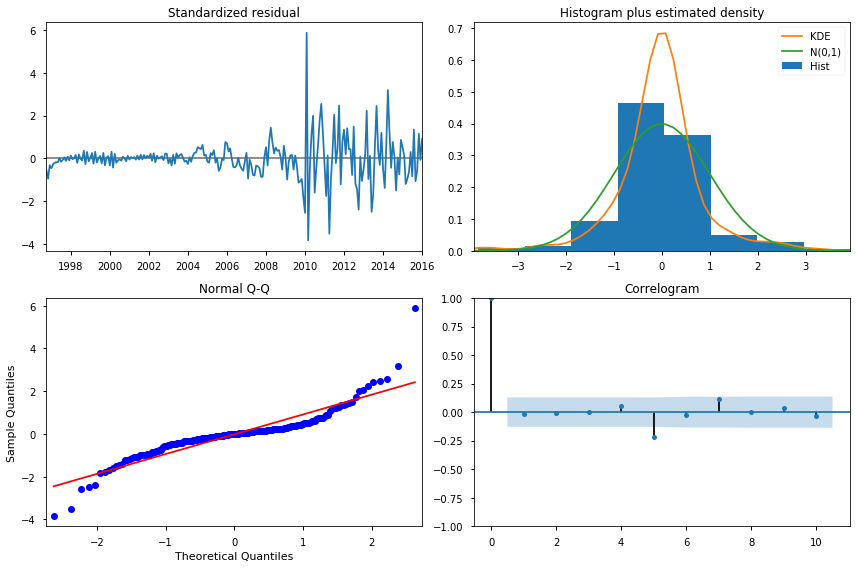

In [30]:
model_output = SARIMAX(ts_train,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False).fit()
display(model_output.summary())
model_output.plot_diagnostics(figsize=(12,8));
plt.tight_layout()

### def roi and model evaluation functions

In [31]:
def model_evaluation(ts_true,ts_pred,show=True,show_u_info=False):
    from sklearn.metrics import mean_squared_error,r2_score

    res= [['Metric','Value']]
    
    res.append(['RMSE', np.sqrt(mean_squared_error(ts_true,ts_pred))])
    
    res.append(['R2',r2_score(ts_true,ts_pred)])
    res.append(["Thiel's U",fs.jmi.thiels_U(ts_true,ts_pred,
                                            display_equation=show_u_info,
                                           display_table=show_u_info)])
    res = fs.list2df(res)
    
    if show:
        display(res)
    return res
    
def expected_roi(investment, final_value):
    """This function takes in a series of forecasts to predict the return
    on investment spanning the entire forecast."""
    roi = np.round(((final_value - investment) / investment)*100,3)
    return roi


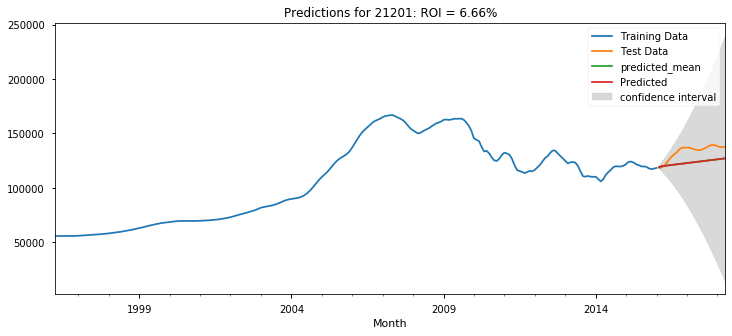

,Metric,Value
0,RMSE,11040.213447
1,R2,-2.076311
2,Thiel's U,7.497152


,lower 21201,upper 21201,predicted_mean
2016-02-01,117257.692246,120948.302511,119102.997378
2016-03-01,115055.464658,124603.482897,119829.473777
2016-04-01,112254.945655,127719.310326,119987.127991
2016-05-01,109851.429155,131058.833121,120455.131138
2016-06-01,106970.138809,134498.858214,120734.498511
2016-07-01,104030.534708,137980.989608,121005.762158
2016-08-01,101006.578957,141661.475989,121334.027473
2016-09-01,97765.419030,145429.296800,121597.357915
2016-10-01,94440.667280,149344.850567,121892.758924
2016-11-01,90963.462977,153398.925802,122181.194390


In [32]:
def get_model_preds_df(model_output,ts_train,ts_test,start=None,end=None, get_metrics=True):
    
    if start is None:
        start=ts_test.index[0]
        
    if end is None:
        end=ts_test.index[-1]    
    # Get predictions starting from 2016 and calculate confidence intervals.
    prediction = model_output.get_prediction(start=start,end=end, 
                                             dynamic=True)
    
    
    preds_df = prediction.conf_int()
    preds_df['predicted_mean'] = prediction.predicted_mean
    plot_df = pd.concat([preds_df,ts_train],axis=1)

    
    ## Get roi for preds:
    roi = expected_roi(preds_df['predicted_mean'].iloc[0],preds_df['predicted_mean'].iloc[-1])
    
    zc =ts_train.name
    
    fig, ax = plt.subplots()
    ts_train.plot(ax=ax,label='Training Data')
    ts_test.plot(ax=ax,label='Test Data')

    
    preds_df['predicted_mean'].plot(ax=ax)
    ax.fill_between(preds_df.index, preds_df[f'lower {zc}'],
                preds_df[f'upper {zc}'], color="k", alpha=.15,
                label = 'confidence interval')

    prediction.predicted_mean.plot(ax=ax,label='Predicted')
    
    
    ax.legend()
    ax.set(title=f"Predictions for {zc}: ROI = {roi}%")
    
    fig = ax.get_figure()
    
    
    plot_df['zipcode']=ts_train.name
    plt.show()
    
    if get_metrics:
        res = model_evaluation(ts_test, preds_df['predicted_mean'])
#         res['Metric']

    return preds_df, fig,ax
    
preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test)
preds_df

In [33]:
tsdict

{21215: Month
 1996-04-01    53500.0
 1996-05-01    53500.0
 1996-06-01    53400.0
 1996-07-01    53300.0
 1996-08-01    53300.0
                ...   
 2017-12-01    66800.0
 2018-01-01    67400.0
 2018-02-01    69500.0
 2018-03-01    72900.0
 2018-04-01    75000.0
 Freq: MS, Name: 21215, Length: 265, dtype: float64, 21224: Month
 1996-04-01     49600.0
 1996-05-01     49400.0
 1996-06-01     49200.0
 1996-07-01     48900.0
 1996-08-01     48600.0
                 ...   
 2017-12-01    173800.0
 2018-01-01    176400.0
 2018-02-01    177900.0
 2018-03-01    177500.0
 2018-04-01    176600.0
 Freq: MS, Name: 21224, Length: 265, dtype: float64, 21218: Month
 1996-04-01    44700.0
 1996-05-01    44700.0
 1996-06-01    44700.0
 1996-07-01    44700.0
 1996-08-01    44700.0
                ...   
 2017-12-01    84800.0
 2018-01-01    88200.0
 2018-02-01    91800.0
 2018-03-01    96400.0
 2018-04-01    99900.0
 Freq: MS, Name: 21218, Length: 265, dtype: float64, 21206: Month
 1996-04-01     73

## META GRID SEARCH

[21215, 21224, 21218, 21206, 21229, 21230, 21239, 21212, 21201, 21211, 21231, 21214, 21210, 21226]


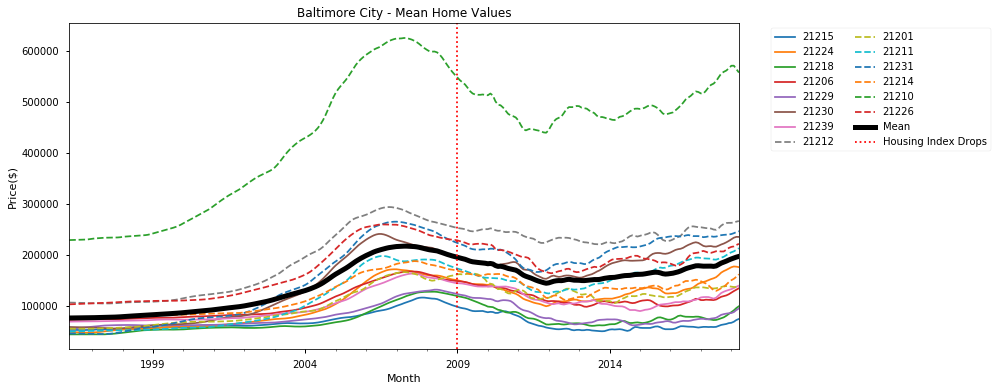

In [34]:
fig,ax,tsdict = plot_ts_dict(BCTY)

In [35]:
print(ts.index[0])
ts.index[0]+ pd.to_timedelta(1,'MS')
end=ts.index[0]+ pd.to_timedelta(1,'MS')
pd.to_datetime(end)

1996-04-01 00:00:00


Timestamp('1996-04-01 00:00:00.001000', freq='MS')

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21215
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:19:42 PM:


100%|██████████| 36/36 [00:02<00:00, 12.45it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:19:45 PM
	Total Time: 0:00:02.893551
Best params:  {'order': (3, 2, 3)}


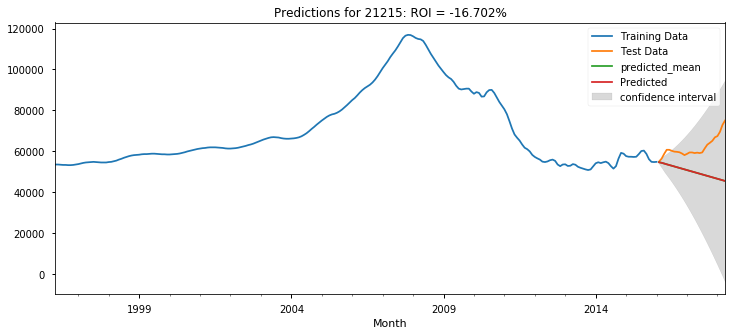

,Metric,Value
0,RMSE,13701.800627
1,R2,-7.380317
2,Thiel's U,10.143418


  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21224
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:19:45 PM:


100%|██████████| 36/36 [00:02<00:00, 12.72it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:19:48 PM
	Total Time: 0:00:02.831108
Best params:  {'order': (3, 2, 3)}


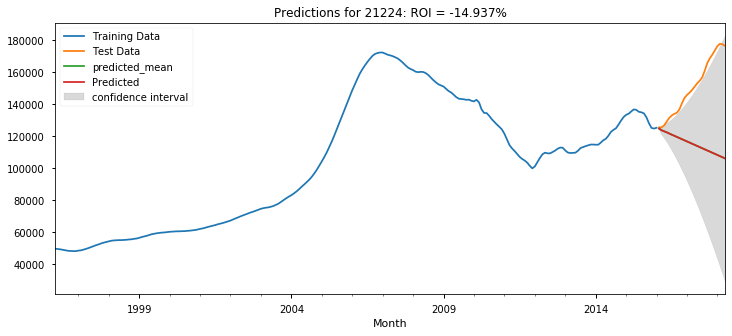

,Metric,Value
0,RMSE,42215.569482
1,R2,-4.762645
2,Thiel's U,16.808308


  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21218
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:19:49 PM:


100%|██████████| 36/36 [00:02<00:00, 12.07it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:19:52 PM
	Total Time: 0:00:02.983426
Best params:  {'order': (1, 2, 3)}


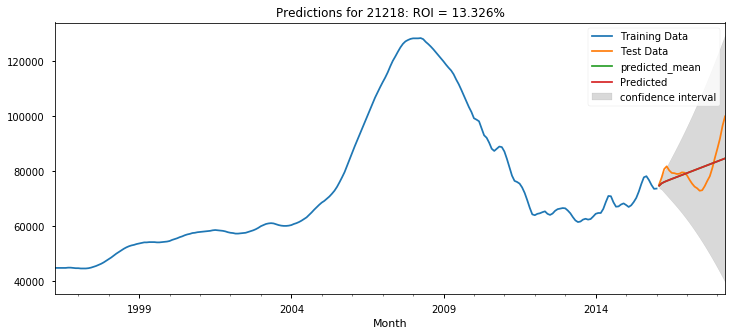

,Metric,Value
0,RMSE,5794.535450
1,R2,0.235102
2,Thiel's U,2.788638


  8%|▊         | 3/36 [00:00<00:01, 16.96it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21206
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:19:52 PM:


100%|██████████| 36/36 [00:03<00:00, 10.51it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:19:55 PM
	Total Time: 0:00:03.426096
Best params:  {'order': (3, 2, 3)}


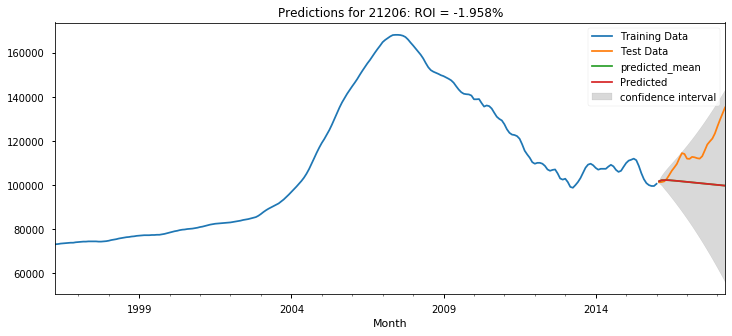

,Metric,Value
0,RMSE,16350.526575
1,R2,-2.276807
2,Thiel's U,8.615619


  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21229
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:19:56 PM:


100%|██████████| 36/36 [00:03<00:00, 11.21it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:19:59 PM
	Total Time: 0:00:03.212991
Best params:  {'order': (0, 2, 3)}


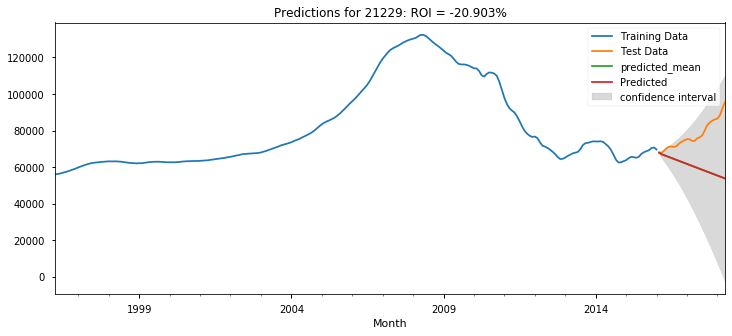

,Metric,Value
0,RMSE,20382.085198
1,R2,-6.401268
2,Thiel's U,13.182413


  6%|▌         | 2/36 [00:00<00:01, 19.58it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21230
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:19:59 PM:


100%|██████████| 36/36 [00:03<00:00, 11.28it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:03 PM
	Total Time: 0:00:03.193364
Best params:  {'order': (3, 2, 3)}


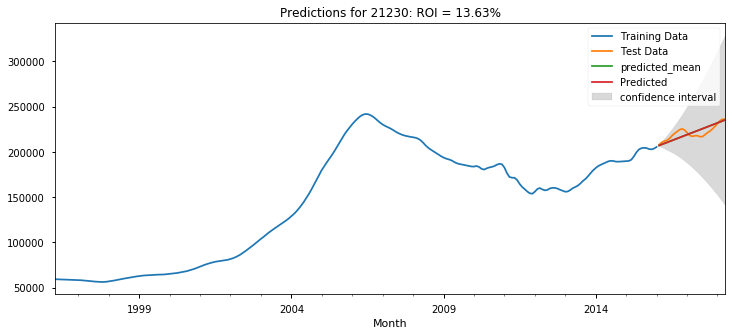

,Metric,Value
0,RMSE,5181.963232
1,R2,0.489944
2,Thiel's U,2.587523


  6%|▌         | 2/36 [00:00<00:01, 19.94it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21239
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:03 PM:


100%|██████████| 36/36 [00:03<00:00,  9.99it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:07 PM
	Total Time: 0:00:03.606078
Best params:  {'order': (3, 3, 3)}


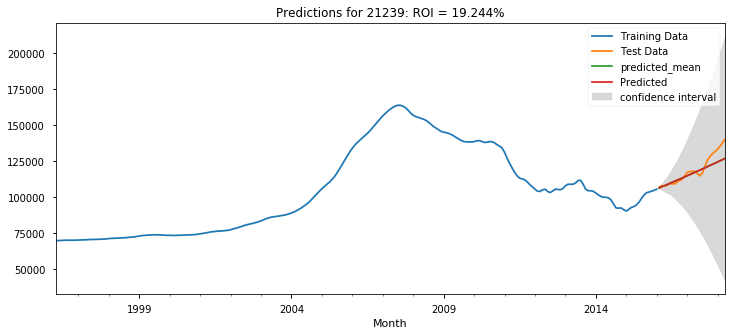

,Metric,Value
0,RMSE,5203.477451
1,R2,0.732920
2,Thiel's U,2.494058


  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21212
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:07 PM:


100%|██████████| 36/36 [00:02<00:00, 12.07it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:10 PM
	Total Time: 0:00:02.983336
Best params:  {'order': (3, 2, 3)}


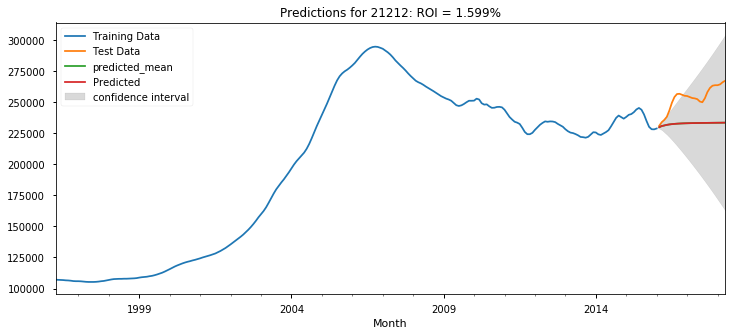

,Metric,Value
0,RMSE,22315.049757
1,R2,-4.473960
2,Thiel's U,8.484468


  8%|▊         | 3/36 [00:00<00:02, 16.29it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21201
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:11 PM:


100%|██████████| 36/36 [00:02<00:00, 12.66it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:13 PM
	Total Time: 0:00:02.845346
Best params:  {'order': (3, 2, 3)}


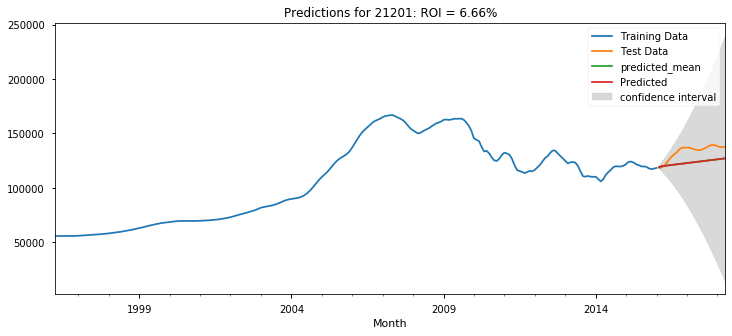

,Metric,Value
0,RMSE,11040.213447
1,R2,-2.076311
2,Thiel's U,7.497152


  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21211
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:14 PM:


100%|██████████| 36/36 [00:03<00:00, 11.73it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:17 PM
	Total Time: 0:00:03.071146
Best params:  {'order': (3, 2, 3)}


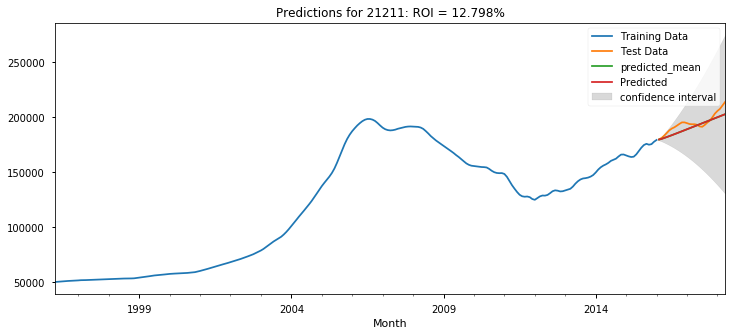

,Metric,Value
0,RMSE,5170.266793
1,R2,0.588046
2,Thiel's U,2.785565


  6%|▌         | 2/36 [00:00<00:01, 18.45it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21231
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:17 PM:


100%|██████████| 36/36 [00:03<00:00,  9.20it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:21 PM
	Total Time: 0:00:03.913545
Best params:  {'order': (1, 2, 3)}


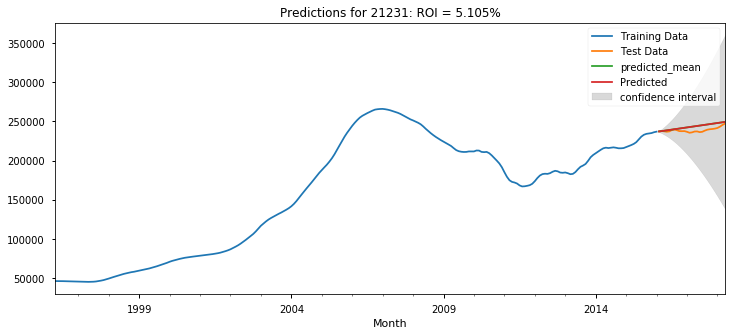

,Metric,Value
0,RMSE,5214.601804
1,R2,-2.510152
2,Thiel's U,5.261285


  8%|▊         | 3/36 [00:00<00:02, 15.80it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21214
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:21 PM:


100%|██████████| 36/36 [00:03<00:00, 10.56it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:25 PM
	Total Time: 0:00:03.411252
Best params:  {'order': (3, 2, 3)}


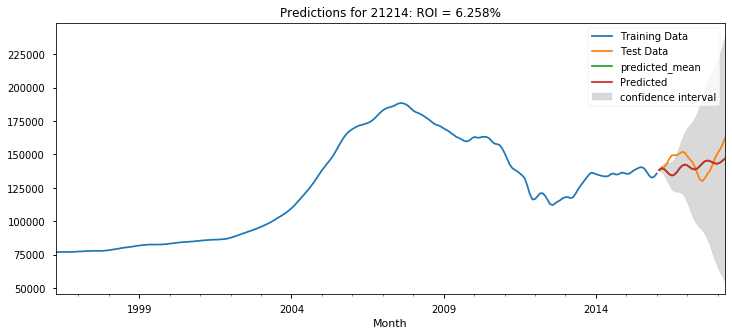

,Metric,Value
0,RMSE,9378.155148
1,R2,-0.398778
2,Thiel's U,3.146085


  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21210
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:25 PM:


100%|██████████| 36/36 [00:03<00:00, 10.71it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:29 PM
	Total Time: 0:00:03.363391
Best params:  {'order': (3, 2, 3)}


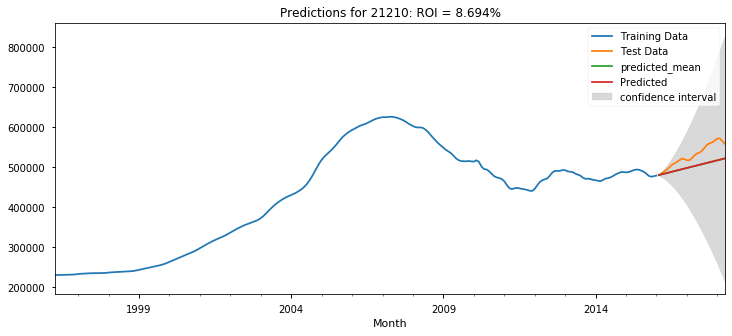

,Metric,Value
0,RMSE,32252.198349
1,R2,-0.362520
2,Thiel's U,6.617328


  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21226
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:29 PM:


100%|██████████| 36/36 [00:03<00:00, 10.89it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:32 PM
	Total Time: 0:00:03.307971
Best params:  {'order': (3, 2, 3)}


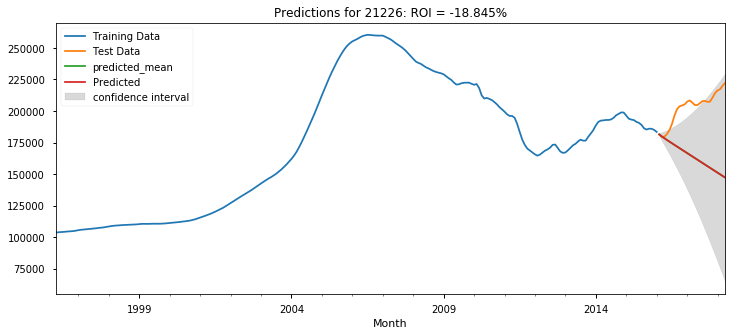

,Metric,Value
0,RMSE,44504.204957
1,R2,-12.441507
2,Thiel's U,16.161229


In [36]:
### META SERACH
params = make_pdq_pdqm()

ts_resdict = {}
for zc,ts in tsdict.items():
    print('\n')
    print('---'*30)
    print('---'*30)
    print(f'ZIPCODE: {zc}')
    ## Train test split
    ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)
    

    ## Grid search
    res = grid_search_arima_optional_s(ts_train,order_dict=params,make_seasonal=False)#pdq,pdqm)
    res.sort_values('AIC',inplace=True)
    best_params =  dict(order=res.iloc[0].loc['pdq'])
    
    ts_resdict[zc]={}
    ts_resdict[zc]['res']=res
    ts_resdict[zc]['best_params'] = best_params
    print('Best params: ',best_params)
    

    ## Using best params
    model_output = SARIMAX(ts_train,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False).fit()
    ts_resdict[zc]['model'] = model_output
    
    preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test)
    ts_resdict[zc]['preds_df'] = preds_df


In [37]:
# ts_resdict.keys()
# ts_resdict[21215].keys()
# ts_resdict[21215]['preds_df']

# Step 6: Interpreting Results

## ADDING FORECAST BASED ON FULL DATA INTO FUTURE

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21215
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:33 PM:


100%|██████████| 36/36 [00:03<00:00, 11.64it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:36 PM
	Total Time: 0:00:03.095520
Best params:  {'order': (3, 2, 3)}


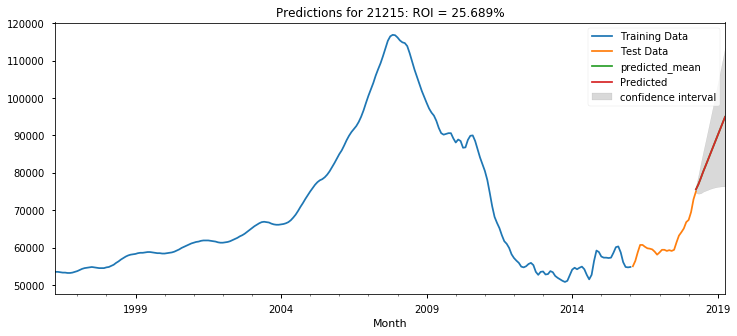

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21224
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:37 PM:


100%|██████████| 36/36 [00:02<00:00, 12.66it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:39 PM
	Total Time: 0:00:02.846392
Best params:  {'order': (3, 2, 3)}


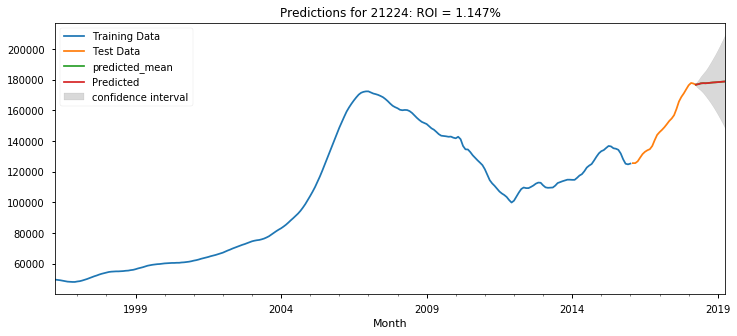

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21218
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:40 PM:


100%|██████████| 36/36 [00:03<00:00, 11.90it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:43 PM
	Total Time: 0:00:03.026466
Best params:  {'order': (1, 2, 3)}


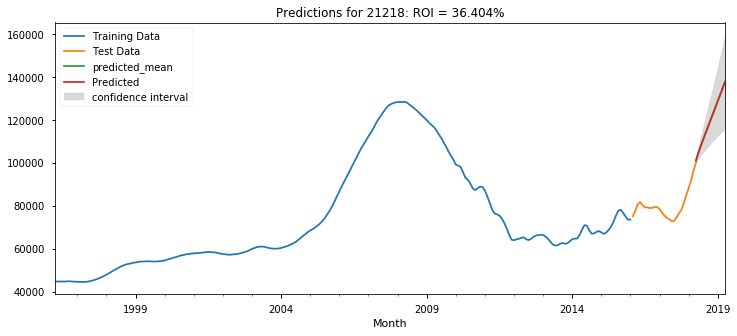

  8%|▊         | 3/36 [00:00<00:01, 17.33it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21206
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:43 PM:


100%|██████████| 36/36 [00:03<00:00, 10.51it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:47 PM
	Total Time: 0:00:03.425766
Best params:  {'order': (3, 2, 3)}


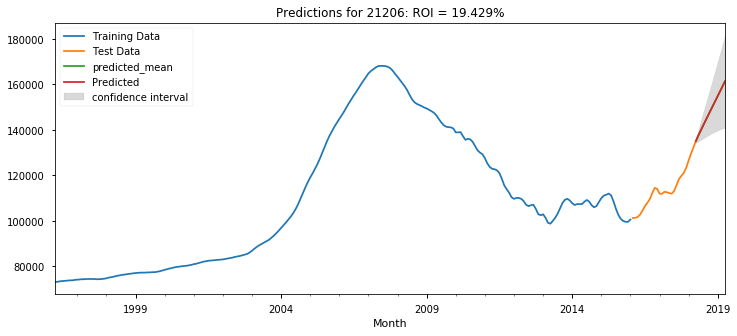

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21229
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:47 PM:


100%|██████████| 36/36 [00:03<00:00, 11.74it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:50 PM
	Total Time: 0:00:03.066982
Best params:  {'order': (0, 2, 3)}


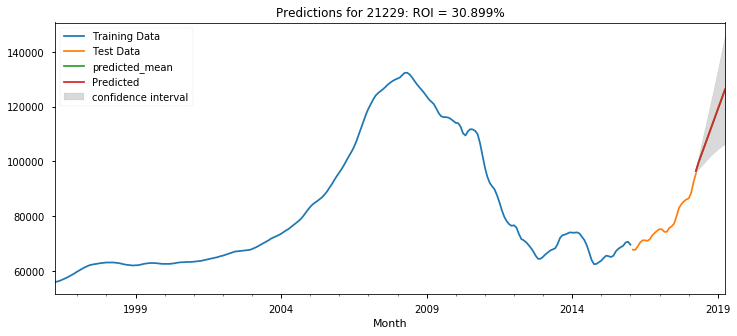

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21230
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:51 PM:


100%|██████████| 36/36 [00:02<00:00, 12.56it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:53 PM
	Total Time: 0:00:02.868928
Best params:  {'order': (3, 2, 3)}


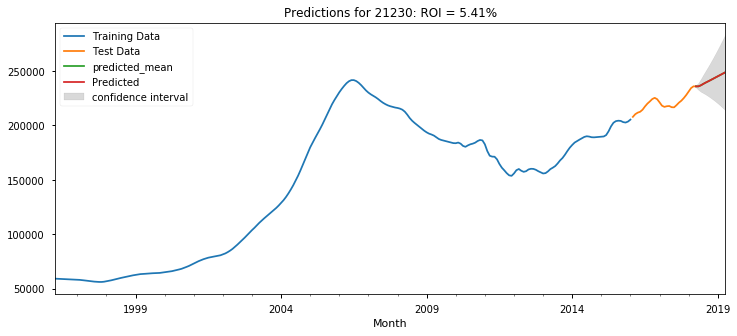

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21239
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:54 PM:


100%|██████████| 36/36 [00:03<00:00, 10.22it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:20:57 PM
	Total Time: 0:00:03.523251
Best params:  {'order': (3, 3, 3)}


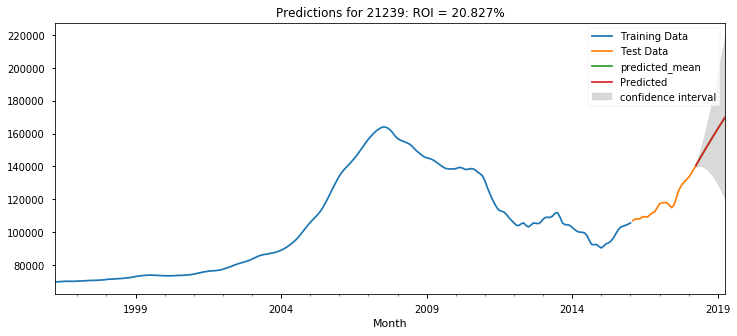

  8%|▊         | 3/36 [00:00<00:02, 15.46it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21212
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:20:58 PM:


100%|██████████| 36/36 [00:02<00:00, 12.29it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:21:01 PM
	Total Time: 0:00:02.931519
Best params:  {'order': (3, 2, 3)}


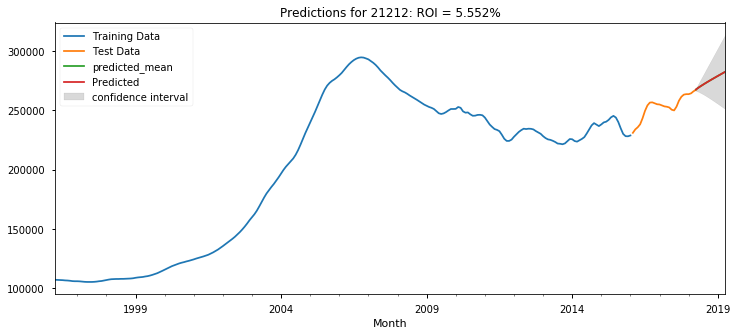

  8%|▊         | 3/36 [00:00<00:02, 15.94it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21201
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:21:01 PM:


100%|██████████| 36/36 [00:02<00:00, 13.39it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:21:04 PM
	Total Time: 0:00:02.690646
Best params:  {'order': (3, 2, 3)}


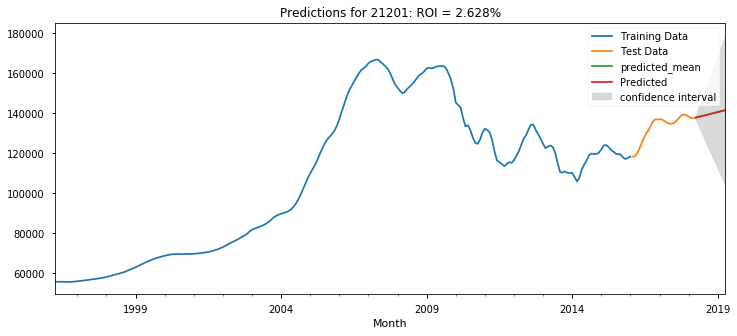

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21211
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:21:04 PM:


100%|██████████| 36/36 [00:02<00:00, 12.13it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:21:07 PM
	Total Time: 0:00:02.970312
Best params:  {'order': (3, 2, 3)}


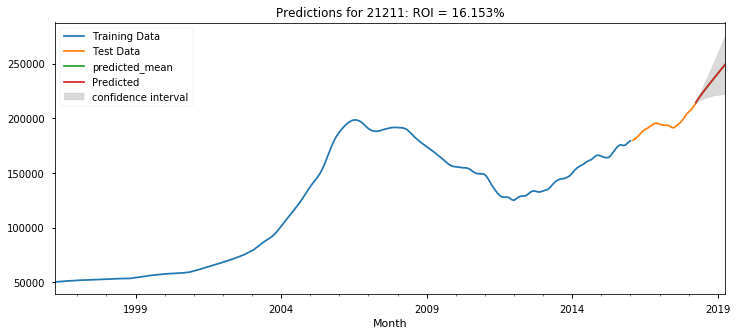

  6%|▌         | 2/36 [00:00<00:01, 19.25it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21231
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:21:07 PM:


100%|██████████| 36/36 [00:03<00:00,  9.55it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:21:11 PM
	Total Time: 0:00:03.772187
Best params:  {'order': (1, 2, 3)}


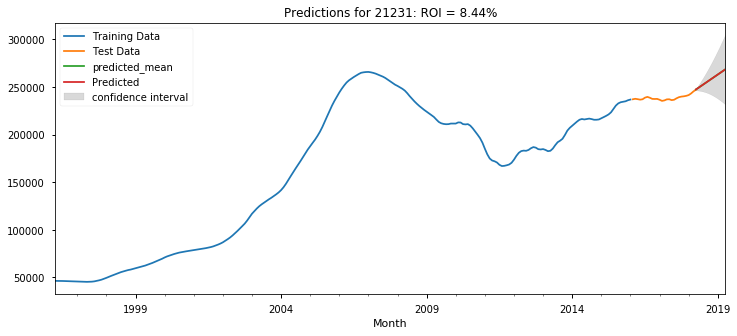

  8%|▊         | 3/36 [00:00<00:02, 16.03it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21214
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:21:12 PM:


100%|██████████| 36/36 [00:03<00:00, 11.11it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:21:15 PM
	Total Time: 0:00:03.240613
Best params:  {'order': (3, 2, 3)}


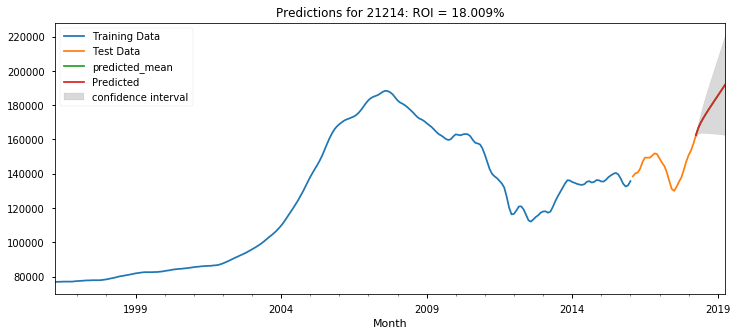

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21210
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:21:15 PM:


100%|██████████| 36/36 [00:03<00:00, 10.99it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:21:19 PM
	Total Time: 0:00:03.278659
Best params:  {'order': (3, 2, 3)}


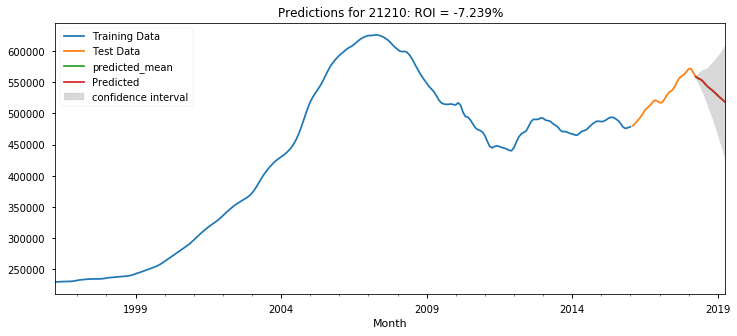

  0%|          | 0/36 [00:00<?, ?it/s]



------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
ZIPCODE: 21226
[i] STARTING GRID SEARCH @ 01/09/2020 - 01:21:19 PM:


100%|██████████| 36/36 [00:03<00:00,  9.83it/s]


[i] GRID SEARCH FINISHED AT 01/09/2020 - 01:21:23 PM
	Total Time: 0:00:03.662726
Best params:  {'order': (3, 2, 3)}


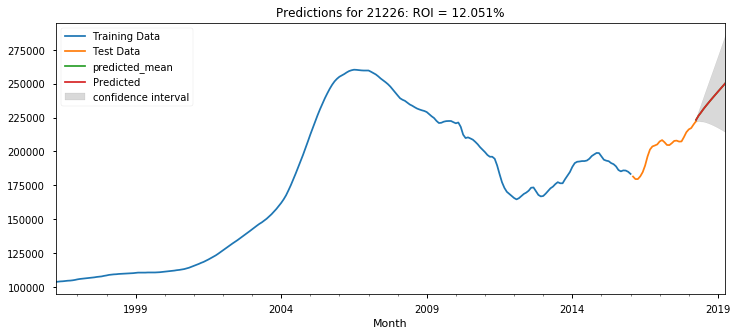

In [38]:
### META SERACH
params = make_pdq_pdqm()

ts_resdict = {}
for zc,ts in tsdict.items():
    print('\n')
    print('---'*30)
    print('---'*30)
    print(f'ZIPCODE: {zc}')
    ## Train test split
    ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)
    

    ## Grid search
    res = grid_search_arima_optional_s(ts_train,order_dict=params,make_seasonal=False)#pdq,pdqm)
    res.sort_values('AIC',inplace=True)
    best_params =  dict(order=res.iloc[0].loc['pdq'])
    
    ts_resdict[zc]={}
    ts_resdict[zc]['res']=res
    ts_resdict[zc]['best_params'] = best_params
    print('Best params: ',best_params)
    

    ## Using best params
    model_output = SARIMAX(ts,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False).fit()
    ts_resdict[zc]['model'] = model_output
    
    preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test,
                                         start=ts.index[-1],end=ts.index.shift(12)[-1],get_metrics=False)#+ pd.to_timedelta(1,'MS'))
    ts_resdict[zc]['preds_df'] = preds_df


# END OF STUDY GROUP 01/09/2020

In [39]:
top_params = res.sort_values('AIC').head(10)
display(top_params)
top_params=top_params.loc[top_params['AIC']>0]

best_params =  dict(order=top_params.iloc[0].loc['pdq'],
             seasonal_order = top_params.iloc[0].loc['PDQM']) 
# pd.DataFrame.from_dict(best_params)
best_params

,pdq,PDQM,AIC
32,"(3, 2, 3)",N/A,3648.082420
29,"(3, 1, 3)",N/A,3661.425855
35,"(3, 3, 3)",N/A,3678.734427
8,"(0, 2, 3)",N/A,3681.222065
20,"(1, 2, 3)",N/A,3681.740970
17,"(1, 1, 3)",N/A,3690.013910
34,"(3, 3, 1)",N/A,3702.556741
30,"(3, 2, 0)",N/A,3707.550833
31,"(3, 2, 1)",N/A,3707.821296
11,"(0, 3, 3)",N/A,3718.676904


{'order': (3, 2, 3), 'seasonal_order': 'N/A'}

In [40]:
len(ts_train)

238

In [41]:
best_params

{'order': (3, 2, 3), 'seasonal_order': 'N/A'}

In [42]:
len(ts_train)

238

In [43]:
# best_params['seasonal_order'] = (4, 1, 4, 12)
# best_params

In [44]:
# model_output = SARIMAX(ts_train,**best_params,
#                       enforce_invertibility=False,
#                       enforce_stationarity=False).fit()


In [45]:
forecast = model_output.forecast(steps=len(ts_test))
forecast

2018-05-01    223877.525200
2018-06-01    225084.883123
2018-07-01    226805.918568
2018-08-01    228213.507383
2018-09-01    229687.844287
2018-10-01    231213.518653
2018-11-01    232675.018609
2018-12-01    234167.881144
2019-01-01    235657.174709
2019-02-01    237138.081995
2019-03-01    238626.311149
2019-04-01    240111.398917
2019-05-01    241596.265800
2019-06-01    243082.230563
2019-07-01    244567.323733
2019-08-01    246052.659963
2019-09-01    247538.056838
2019-10-01    249023.293775
2019-11-01    250508.613260
2019-12-01    251993.907750
2020-01-01    253479.183584
2020-02-01    254964.475261
2020-03-01    256449.756001
2020-04-01    257935.036494
2020-05-01    259420.318510
2020-06-01    260905.597791
2020-07-01    262390.877552
Freq: MS, dtype: float64

In [46]:
model_output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  21226   No. Observations:                  265
Model:               SARIMAX(3, 2, 3)   Log Likelihood               -2057.377
Date:                Thu, 09 Jan 2020   AIC                           4128.755
Time:                        13:21:23   BIC                           4153.653
Sample:                    04-01-1996   HQIC                          4138.765
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0846      0.092     -0.919      0.358      -0.265       0.096
ar.L2          0.2012      0.093      2.158      0.031       0.018       0.384
ar.L3          0.2337      0.059      3.949      0.000       0.118       0.350
ma.L1          0.6988      0.077      9.021      0.000       0.547       0.851
ma.L2         -0.5387      0.107     -5.053      0.000      -0.748      -0.330
ma.L3         -0.7888      0.069    -11.475      0.000      -0.924      -0.654
sigma2       4.91e+05   2.39e+04     20.515      0.000    4.44e+05    5.38e+05
===================================================================================
Ljung-Box (Q):                       75.95   Jarque-Bera (JB):               593.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              22.47   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
preds = model_output.predict(start=ts_test.index[0],end=ts_test.index[-1])

In [48]:
preds

Month
2016-02-01    181293.655589
2016-03-01    180235.224936
2016-04-01    177489.434246
2016-05-01    181023.337008
2016-06-01    183580.162230
2016-07-01    187360.442882
2016-08-01    195543.280076
2016-09-01    201905.938535
2016-10-01    204890.499454
2016-11-01    205179.416176
2016-12-01    204793.767593
2017-01-01    206657.966806
2017-02-01    210042.185350
2017-03-01    207938.942107
2017-04-01    205009.217964
2017-05-01    203792.939797
2017-06-01    205396.000271
2017-07-01    207830.254048
2017-08-01    209104.641105
2017-09-01    207426.964681
2017-10-01    206974.654601
2017-11-01    208137.591840
2017-12-01    215079.982888
2018-01-01    216300.002264
2018-02-01    217863.612132
2018-03-01    218485.048441
2018-04-01    223346.419947
Freq: MS, dtype: float64

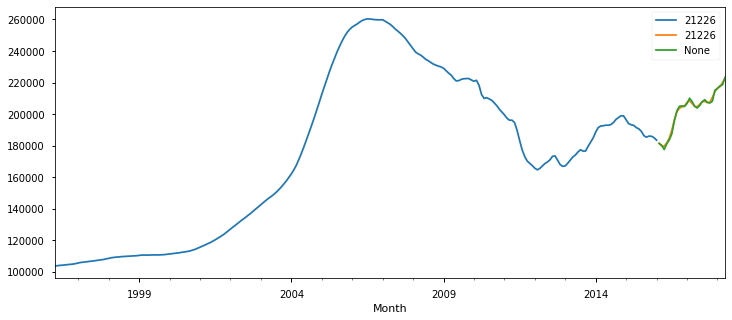

In [49]:
f,ax=plt.subplots()
ts_train.plot(ax=ax)
ts_test.plot(ax=ax)
# forecast.plot(ax=ax,ls=':',lw=3)
preds.dropna().plot(ax=ax)
ax.legend()

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
fs.jmi.thiels_U

def model_evaluation(ts_true,ts_pred,show=True):
    res= [['Metric','Value']]
    
    res.append(['RMSE', np.sqrt(mean_squared_error(ts_true,ts_pred))])
    
    res.append(['R2',r2_score(ts_true,ts_pred)])
    res.append(["Thiel's U",fs.jmi.thiels_U(ts_true,ts_pred)])
    res = fs.list2df(res)
    if show:
        display(res)
    return res
    
def plot_true_test_preds(ts_train,ts_test,ts_preds):
    f,ax=plt.subplots()
    ts_train.plot(ax=ax)
    ts_test.plot(ax=ax)
    # forecast.plot(ax=ax,ls=':',lw=3)
    preds.dropna().plot(ax=ax)
    ax.legend()
    return f,ax

<IPython.core.display.Latex object>

|Thiel's U Value | Interpretation |
    | --- | --- |
    | <1 | Forecasting is better than guessing| 
    | 1 | Forecasting is about as good as guessing| 
    |>1 | Forecasting is worse than guessing| 


,Metric,Value
0,RMSE,1091.929148
1,R2,0.991908
2,Thiel's U,0.421263


(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1c22d128>)

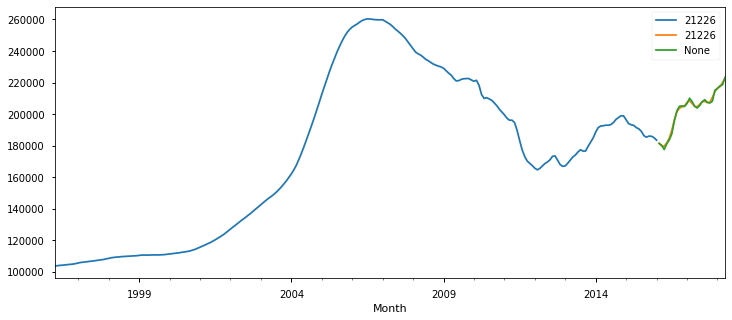

In [51]:
model_evaluation(ts_test, preds)
plot_true_test_preds(ts_train,ts_test,preds)